## Importing all the libraries

In [96]:
import h5py
import numpy as np
import pandas as pd
import os
import time
import collections
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import collections
from scipy import linalg
from time import gmtime, strftime, localtime

## Loading data and data pre-processing

In [2]:
def loading_data_label(data_path):
    
    # Loading the data into numpy arrays
    with h5py.File(data_path,'r') as H:
        key = list(H.keys())[0]
        data = np.copy(H[key])
    
    return data
    
    

In [3]:
def output_predicted_file(dr,label_pred):
    output_path = dr+"/"+"predicted_labels.h5"
    with h5py.File(output_path, 'w') as label_output:
        label_output.create_dataset('output', data=label_pred)

In [4]:
def data_preprocessing_for_NN(data):
    # Standardization of Data
    for i in range(data.shape[0]):
#         data[i] = (data[i] - data[i].mean()) / (data[i].std())
        data[i] = data[i] / (data[i].std())
    
    # Returning the transpose of data as required by the NN in that shape
    return (data.T)

# EDA

In [5]:
# The path of the directory containing the training data is passed here
input_dir = "./Input"
data_path = input_dir+"/"+"images_training.h5"
label_path = input_dir+"/"+"labels_training.h5"

data  = loading_data_label(data_path)
label = loading_data_label(label_path)
print(label.shape, data.shape)

(30000,) (30000, 784)


In [6]:
#create label and training data
label = pd.DataFrame(label) 
data = pd.DataFrame(data) 
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.070588,0.396078,...,0.639216,0.596078,0.486275,0.517647,0.164706,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.521569,...,0.352941,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.286275,0.219608,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.223529,0.250980,0.125490,0.000000,0.007843,0.0,0.0,0.0,0.0,0.0


In [7]:
#quickly check our labls
label.head()

,0
0,0
1,3
2,7
3,3
4,0


In [8]:
print(data.head())
print(data.info())
print("\n Shape of our dataset:", data.shape)

   0    1    2    3    4         5    6    7         8         9    ...  \
0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.070588  0.396078  ...   
1  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.521569  ...   
2  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  ...   
3  0.0  0.0  0.0  0.0  0.0  0.003922  0.0  0.0  0.286275  0.219608  ...   
4  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.086275  ...   

        774       775       776       777       778  779  780  781  782  783  
0  0.639216  0.596078  0.486275  0.517647  0.164706  0.0  0.0  0.0  0.0  0.0  
1  0.352941  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
4  0.223529  0.250980  0.125490  0.000000  0.007843  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3

In [9]:
#check for Nan value
null = data.isnull().sum()
print(null[null != 0])

Series([], dtype: int64)


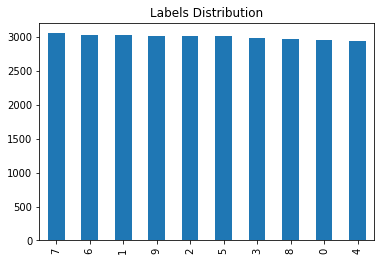

In [10]:
#check if our data is imbalance
_ = label[0].value_counts().plot(kind='bar')
plt.title("Labels Distribution")
plt.show()

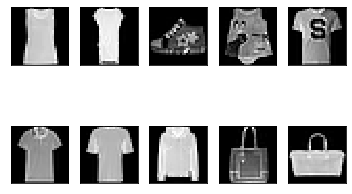

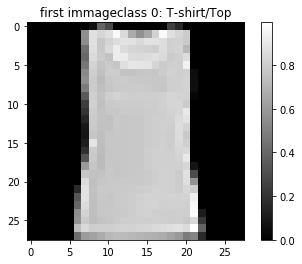

In [11]:
data_train_preview = data.values.reshape((data.shape[0], 28, 28))

    
train_preview = data
images = range(10)
    
subset = train_preview.iloc[images,:]
    
subset.index = range(1, 11)    
    
for i, row in subset.iterrows():
        
    plt.subplot(2, 5, i)
    pixel = row.values.reshape((28,28))
    plt.imshow(pixel, cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    
plt.figure()
plt.imshow(data_train_preview[0], cmap=plt.get_cmap('gray'))
plt.title("first immage" + "class " + str(label.at[0,0]) + ": T-shirt/Top" )
plt.colorbar()
plt.grid(False)
    
plt.show()

In [12]:
split = int( 0.7 * data.shape[0] )

# Logistic Regession

In [13]:
input_dir = "./Input"
data_path = input_dir+"/"+"images_training.h5"
label_path = input_dir+"/"+"labels_training.h5"

data  = loading_data_label(data_path)
label = loading_data_label(label_path)
print(label.shape, data.shape)

(30000,) (30000, 784)


### Feature Scaling

In [14]:
# Feature Scaling
def feature_scaling(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1  # divide by 0 adjustment
    return x_min + nom/denom 

# apply function on training data
data_train_scaled = feature_scaling(data, -0.5, 0.5)

### PCA using SVD

In [15]:
# Dimension reduction using SVD
U, A, Vt = linalg.svd(data_train_scaled, full_matrices=False)

# Selecting k dimensions
k=550
print("Feature selection : {}".format(k))

Feature selection : 550


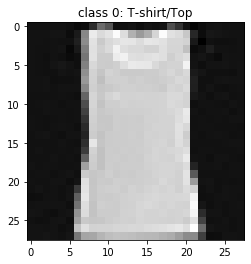

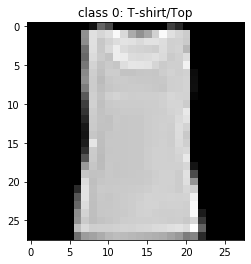

In [16]:
# Reconstructing and visualising truncated data
data_train_reconstuct = np.dot(U[:,0:k], np.dot(np.diag(A[0:k]),Vt[0:k,:]))

data_recon_shaped = data_train_reconstuct.reshape((data_train_reconstuct.shape[0], 28, 28))
data_train_shaped = data.reshape((data.shape[0], 28, 28))

plt.imshow(data_recon_shaped[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(label[0]) + ": T-shirt/Top" )
plt.show()

plt.imshow(data_train_shaped[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(label[0]) + ": T-shirt/Top" )
plt.show()

In [17]:
# Truncated SVD based on k features selection
# This truncated data will be used for training and validation
# Overwriting training data with truncated training data
data_train = np.dot(U[:,0:k], np.diag(A[0:k]))

# Checking dimension
print(data_train.shape)

(30000, 550)


### Logistic Regression Functions

In [18]:
# Sigmoid function
def sigmoid_function(x):
    return (1 / (1 + np.exp(-x)))

# Loss/cross entropy function - log likelihood
def cross_entropy_error_e(features_x, label_y, theta_s):
    sigma = sigmoid_function(features_x @ theta_s)
    sigma[sigma == 1] = 0.999999 # avoid 0 for log(1)
    
    entropy_error = label_y.T @ np.log(sigma) + (1 - label_y).T @ np.log(1 - sigma)
    entropy_error = -1 * entropy_error
    return entropy_error / len(label_y)

In [19]:
# Loss/cross entropy function - log likelihood
# Added regularisation paramter "lambda"
def cross_entropy_error_regularized(features_x, label_y, theta_s, lambda_r):
    sigma = sigmoid_function(features_x @ theta_s)
    sigma[sigma == 1] = 0.999999 # avoid 0 for log(1)
    
    entropy_error = label_y.T @ np.log(sigma) + (1 - label_y).T @ np.log(1 - sigma)
    entropy_error = (-1 * entropy_error) + ((lambda_r/2) * theta_s.T @ theta_s)
    return entropy_error / len(label_y)

In [20]:
# Gradient descent for optimisation
def gradient_descent_gd(features_x, label_y, learn_rate, num_iter, lambda_r):
    num_features = features_x.shape[1]
    theta = np.zeros(num_features)
    entropy_error_hist = np.zeros((num_iter,1))
    
    for i in range(num_iter):
        sigma = sigmoid_function(features_x @ theta)
        theta -= (learn_rate * (features_x.T @ (sigma - label_y))) / len(label_y)
        entropy_error_hist[i] = cross_entropy_error_regularized(features_x, label_y, theta_s=theta, lambda_r=lambda_r)
    return entropy_error_hist, theta

In [21]:
#merging labels with features before random folds
data_combined = np.c_[data_train, label]

### Random Sampling of Training data

In [22]:
# Creating validation and train data based on random index
indices = np.random.permutation(data_combined.shape[0])
# Traing set - 50%
# Validation set 1 - 10%
# Validation set 2 - 10%
training_idx, validation_idx = indices[:int(0.5*data_combined.shape[0])], indices[int(0.7*data_combined.shape[0]):int(0.8*data_combined.shape[0])]

In [23]:
# adding 1's for constant weight w0
data_combined = np.c_[np.ones(data_combined.shape[0]), data_combined]

In [24]:
training_set, validation_set = data_combined[training_idx,:], data_combined[validation_idx,:]
print(training_set.shape)

(15000, 552)


### Hyperparameter Tuning - Logistic

Initial cost with theta = 0 for item 0 is : 0.6931471805599467
Starting learning for item : 7
Learning rate set to : 0.01 ...
Learning rate set to : 0.02 ...
Learning rate set to : 0.05 ...
Learning rate set to : 0.1 ...


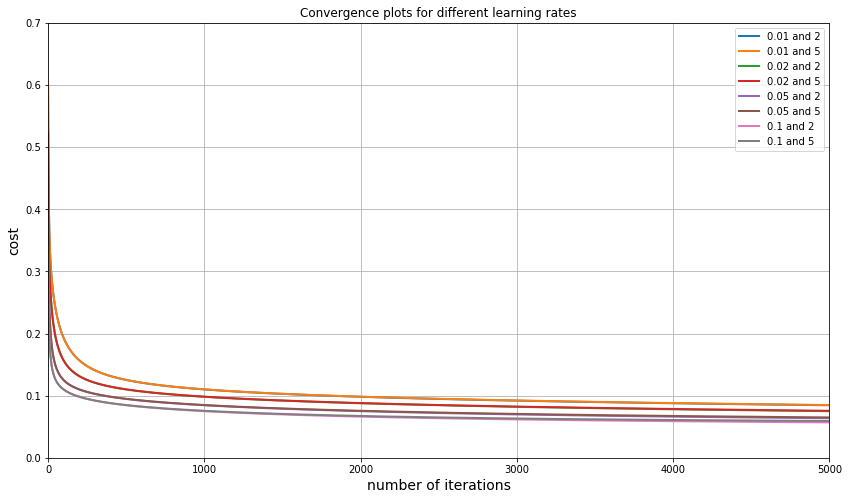

In [25]:
from math import ceil

# find optimum learning rate and lamda for one label
label_learn = (training_set[:,k+1] == 7).astype(int)
init_theta = np.zeros(training_set.shape[1] - 1)

# Initial loss/cost
entropy_initial = cross_entropy_error_regularized(features_x=training_set[:,0:(k+1)],label_y=label_learn,theta_s=init_theta, lambda_r=2)
print("Initial cost with theta = 0 for item {} is : {}".format(0, entropy_initial))

num_iters = 5000
# sample learning rates
learning_rates = [0.01, 0.02,0.05, 0.1]
# sample lambda
lambda_rate = [2,5]

print("Starting learning for item : 7")
plt.figure(figsize=(14,8))
leg = []

for lr in learning_rates:
    print("Learning rate set to : {} ...".format(lr))
    for lm in lambda_rate:
        cost_history, temp = gradient_descent_gd(features_x=training_set[:,0:(k+1)], label_y=label_learn, learn_rate=lr, num_iter=num_iters, lambda_r=lm)
        leg.append(str(lr) + " and " + str(lm))
        plt.plot(cost_history, linewidth=2)

plt.title("Convergence plots for different learning rates")
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.legend(list(map(str, leg)))
plt.axis([0, num_iters, 0, 0.7])
plt.grid()

In [26]:
# registering time for perfomance measurement
start = time.time()
print(strftime("%a, %d %b %Y %H:%M:%S +0000", localtime()))

Tue, 08 Oct 2019 11:26:43 +0000


### Train Logistic Model

In [27]:
%%time
# Training data
X = training_set[:,0:(k+1)]
# Labels for training set
y = training_set[:,k+1]
# Initializing classifier for each label
classifiers = np.zeros(shape=(10, training_set.shape[1] - 1))
print("Classifier size : {}".format(classifiers.shape))

for c in range(0, 10):
    label = (y == c).astype(int)
    _, classifiers[c, :] = gradient_descent_gd(features_x=X, label_y=label, learn_rate=0.01, num_iter=5000, lambda_r=2)

# Predicting probabilities
classProbabilities = sigmoid_function(X @ classifiers.transpose())

# labeling data based on maximum probability
predictions = classProbabilities.argmax(axis=1)

# Accuracy measurement for training data
print("-------------------------------------------------------")
print("Training accuracy:", str(100 * np.mean(predictions == y)) + "%")
print("-------------------------------------------------------")
print(strftime("%a, %d %b %Y %H:%M:%S +0000", localtime()))

Classifier size : (10, 551)
-------------------------------------------------------
Training accuracy: 81.04%
-------------------------------------------------------
Tue, 08 Oct 2019 11:33:51 +0000
CPU times: user 13min 10s, sys: 12.3 s, total: 13min 23s
Wall time: 7min 7s


In [28]:
# Prediction distribution
print(collections.Counter(predictions))

Counter({3: 1653, 9: 1592, 4: 1588, 0: 1552, 5: 1519, 7: 1518, 2: 1510, 8: 1478, 1: 1442, 6: 1148})


### Validation set 1

In [29]:
%%time
# Applying classifier on validation set 1
X = validation_set[:,0:(k+1)]
y = validation_set[:,(k+1)]

classProbabilities = sigmoid_function(X @ classifiers.transpose())
predictions = classProbabilities.argmax(axis=1)
print("-------------------------------------------------------")
print("validation accuracy:", str(100 * np.mean(predictions == y)) + "%")
print("-------------------------------------------------------")

print("Prediction distribution for Validation set 1 : {}".format(collections.Counter(predictions)))
print("--- Total time taken in Training and Validation ---")
print("--- %s sec ---" % (time.time() - start))
print(strftime("%a, %d %b %Y %H:%M:%S +0000", localtime()))

-------------------------------------------------------
validation accuracy: 80.86666666666666%
-------------------------------------------------------
Prediction distribution for Validation set 1 : Counter({0: 330, 7: 325, 4: 313, 3: 307, 9: 302, 5: 302, 2: 301, 8: 300, 1: 291, 6: 229})
--- Total time taken in Training and Validation ---
--- 427.93053221702576 sec ---
Tue, 08 Oct 2019 11:33:51 +0000
CPU times: user 13.4 ms, sys: 2.35 ms, total: 15.7 ms
Wall time: 12.3 ms


### Validation set 2

In [30]:
%%time
# Applying classifier on validation set 2
validation_idx_2 = indices[int(0.8*data_combined.shape[0]):int(0.9*data_combined.shape[0])]
validation_set_2 = data_combined[validation_idx_2,:]

X = validation_set_2[:,0:(k+1)]
y_validation = validation_set_2[:,(k+1)]
classProbabilities = sigmoid_function(X @ classifiers.transpose())
predictions_validation = classProbabilities.argmax(axis=1)
print("-------------------------------------------------------")
print("validation set 2 accuracy:", str(100 * np.mean(predictions_validation == y_validation)) + "%")
print("-------------------------------------------------------")

print("Prediction distribution for Validation set 2 : {}".format(collections.Counter(predictions_validation)))
print(collections.Counter(predictions_validation))
print("--- %s sec ---" % (time.time() - start))
print(strftime("%a, %d %b %Y %H:%M:%S +0000", localtime()))

-------------------------------------------------------
validation set 2 accuracy: 80.83333333333333%
-------------------------------------------------------
Prediction distribution for Validation set 2 : Counter({3: 349, 5: 317, 7: 306, 8: 303, 0: 302, 2: 300, 9: 299, 1: 298, 4: 298, 6: 228})
Counter({3: 349, 5: 317, 7: 306, 8: 303, 0: 302, 2: 300, 9: 299, 1: 298, 4: 298, 6: 228})
--- 427.996062040329 sec ---
Tue, 08 Oct 2019 11:33:51 +0000
CPU times: user 21.8 ms, sys: 7.45 ms, total: 29.2 ms
Wall time: 55.3 ms


### Apply classifier of Test Data

In [31]:
%%time

data_path = input_dir+"/"+"images_testing.h5"
label_path = input_dir+"/"+"labels_testing_2000.h5"

data_pred  = loading_data_label(data_path)
label_pred = loading_data_label(label_path)
print(label_pred.shape, data_pred.shape)
               
# Feature scaling for test data
data_pred_scaled = feature_scaling(data_pred, -0.5, 0.5)

# SVD on test data to match classifier dimension
U_test, A_test, Vt_test = linalg.svd(data_pred_scaled, full_matrices=False)
data_pred = np.dot(U_test[:,0:k], np.diag(A_test[0:k]))
print("Test data size : {}".format(data_pred.shape))

# padding 1's
data_pred_combined = np.c_[np.ones(data_pred.shape[0]), data_pred]

# Selecting first 2000 samples with labels
X = data_pred_combined[0:2000,:]
y = label_pred

# Predicting output labels
classProbabilities = sigmoid_function(X @ classifiers.transpose())
predictions = classProbabilities.argmax(axis=1)

print("-------------------------------------------------------")
print("Testing accuracy:", str(100 * np.mean(predictions == y)) + "%")
print("-------------------------------------------------------")
print(strftime("%a, %d %b %Y %H:%M:%S +0000", localtime()))

(2000,) (10000, 784)
Test data size : (10000, 550)
-------------------------------------------------------
Testing accuracy: 59.699999999999996%
-------------------------------------------------------
Tue, 08 Oct 2019 11:33:52 +0000
CPU times: user 1.45 s, sys: 143 ms, total: 1.6 s
Wall time: 957 ms


### Logistic Regression - Evaluation

In [32]:
# Creating Confusion Matrix using validation set 2
y_act = pd.Series(y_validation, name = "Actual")
y_pred = pd.Series(predictions_validation, name = "Predicted")
confusion = pd.crosstab(y_act, y_pred)

#check the confusion matrix
confusion

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0.0,230,1,5,18,1,3,14,0,5,0
1.0,2,289,7,13,2,0,2,0,0,0
2.0,1,0,205,3,42,4,34,0,5,0
3.0,8,5,7,290,10,0,8,0,1,0
4.0,1,1,32,7,211,1,29,0,2,0
5.0,0,0,0,0,0,271,0,30,1,9
6.0,60,2,41,14,29,3,133,0,6,0
7.0,0,0,0,0,0,22,0,254,0,29
8.0,0,0,3,4,3,7,8,2,283,2


In [33]:
#check the normalised confusion matrix
confusion_acc = confusion / confusion.sum(axis = 1)
confusion_acc

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0.0,0.830325,0.003175,0.017007,0.054711,0.003521,0.009646,0.048611,0.000000,0.016026,0.000000
1.0,0.007220,0.917460,0.023810,0.039514,0.007042,0.000000,0.006944,0.000000,0.000000,0.000000
2.0,0.003610,0.000000,0.697279,0.009119,0.147887,0.012862,0.118056,0.000000,0.016026,0.000000
3.0,0.028881,0.015873,0.023810,0.881459,0.035211,0.000000,0.027778,0.000000,0.003205,0.000000
4.0,0.003610,0.003175,0.108844,0.021277,0.742958,0.003215,0.100694,0.000000,0.006410,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.871383,0.000000,0.098361,0.003205,0.031579
6.0,0.216606,0.006349,0.139456,0.042553,0.102113,0.009646,0.461806,0.000000,0.019231,0.000000
7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.070740,0.000000,0.832787,0.000000,0.101754
8.0,0.000000,0.000000,0.010204,0.012158,0.010563,0.022508,0.027778,0.006557,0.907051,0.007018


In [34]:
confussion = confusion.values
confusion_acc = confusion_acc.values

In [35]:
#get accuracy for each labels
labels_acc = np.diag(confusion_acc)
labels_acc

array([0.83032491, 0.91746032, 0.69727891, 0.88145897, 0.74295775,
       0.87138264, 0.46180556, 0.83278689, 0.90705128, 0.90877193])

# Random Forest

### Function Definition

In [36]:
#Class for our Random Forest model
class RandomForest():
    
    #Create our fit function: use this to fit the model
    def fit(self, x, y, size, n_trees = 6, depth=10):
        np.random.seed(100)
        #populate our variables
        self.x, self.y, self.size, self.depth  = x, y, size, depth
        #create trees based on the number of n_trees
        self.trees = []
        for i in range(n_trees):
            self.trees.append(self.create_tree())

    #This model is use to create trees to populate our forest
    def create_tree(self):
        
        #randomly select sample for each tree
        sample_idx = np.random.permutation(len(self.y))[:self.size]
        print("List of selected sample used in our tree:",sample_idx)
        
        #list of index based on the size of our each tree size
        self.id = np.array(range(len(sample_idx)))
        
        #call the decision tree function
        return DecisionTree(self.x[sample_idx], self.y[sample_idx],
                            self.id, 
                            depth = self.depth)
    
    #Use this to create prediction; we'll use the mode to pick the most common result
    def predict(self, x):
        return stats.mode([i.predict(x) for i in self.trees], axis=0)

#Class for the decission tree to populate our Random Forest models

class DecisionTree():
    
    #Function to create the trees. Here we put in all the variables
    def __init__(self, x, y,id,depth=10):
        self.x, self.y, self.id = x, y, id
        self.depth = depth
        self.length = len(self.id)
        self.col_x = x.shape[1]
        self.val_mean = np.mean(y[self.id])
        self.score = np.inf
        self.SplitTree()
    
    #define the split for our tree and recall the Dicision Tree to create the lower child/ branch
    def SplitTree (self):
        #go to all column of x to find the best split
        for i in range(self.col_x): self.find_best_split(i)
            
        if self.score == np.inf or self.depth <= 0: return 
        
        #use result from fast split to split our tree
        #we can also use np.nonzero. However, this method will save us a few secs
        x = self.x[self.id,self.varidx]
        xlcnt, xrcnt, d = [],[],0
        for i in x:
            if i <= self.split:
                xlcnt.append(d)
            else:
                xrcnt.append(d)
            d += 1

        left = self.id[xlcnt]; right = self.id[xrcnt]
        
        #create the decision tree based on our split
        self.left = DecisionTree(self.x, self.y, left, 
                                 depth=self.depth-1)
        self.right = DecisionTree(self.x, self.y, right, 
                                  depth=self.depth-1)
    
  
    
    def find_best_split(self, varidx):
        x, y = self.x[self.id,varidx], self.y[self.id]
        
        #sort our values
        sort_i = np.argsort(x, kind = "heapsort")
        sort_y,sort_x = y[sort_i], x[sort_i]        
        
        left = list(sort_y)
        right_count,right_sum,right_sum2,right = 0,0.,0.,[]

        for i in range(0,self.length-2):
            a = left.pop(0)
            right_count += 1
            right.append(a)
            
            if i<1 or sort_x[i]==sort_x[i+1]:
                continue

            #calculate the standard deviation
            left_std = stats.tstd(left)
            right_std = stats.tstd(right)
            
            #use std to get our score
            curr_score = left_std*(self.length - right_count) + right_std  * (right_count)
            
            #Here we'll record the best split
            if curr_score<self.score: 
                self.varidx,self.score,self.split = varidx,curr_score,sort_x[i]                                      
                    
                
    #Function to create our prediction
    def predict(self, data):
        return np.array([self.pred(i) for i in data])

    def pred(self, row_data):
        if self.score == np.inf or self.depth <= 0: 
            return self.val_mean
        trs = self.left if row_data[self.varidx]<=self.split else self.right
        return trs.pred(row_data)

In [37]:
def calculate_accuracy(label, label_predicted):
    acc = np.sum(label_predicted == label)/ label_predicted.shape[0]
    return acc

In [38]:
# The path of the directory containing the training data is passed here
input_dir = "./Input"
data_path = input_dir+"/"+"images_training.h5"
label_path = input_dir+"/"+"labels_training.h5"

data  = loading_data_label(data_path)
label = loading_data_label(label_path)
print(label.shape, data.shape)

(30000,) (30000, 784)


In [39]:
# Training Set
data_train = data[0:split,:]
label_train = label[0:split]

# Validation Set
data_validation  = data[split:data.shape[0],:]
label_validation = label[split:data.shape[0]]

### Hyperparameter Tuning

In [40]:
sizes = [20, 50, 100, 150, 180, 200]

loop_acc = []
rt = []

for i in sizes:
    rf = RandomForest()
    import time
    start = time.time()
    model = rf.fit(data_train, label_train, size = i, n_trees = 1, depth=8)
    pred = rf.predict(x = data_validation)
    pred = pred[0].astype(int)
    pred = pd.DataFrame(pred[0])[0]
    acc = calculate_accuracy(label_validation, pred)
    t = time.time() - start
    rt.append(t)
    print(acc)
    loop_acc.append(acc)

List of selected sample used in our tree: [ 1683  9142  8327 12996  6295 13771  4425 18860 16073  8291 15701  9546
  2483  6310 11703 15605 16193  1284 14671  3152]
0.21788888888888888
List of selected sample used in our tree: [ 1683  9142  8327 12996  6295 13771  4425 18860 16073  8291 15701  9546
  2483  6310 11703 15605 16193  1284 14671  3152  3059  6924  8727 11600
 14791  5067  3817  8702 14318 16536  6798  7318  6699 20255  2311 11608
 14523 19071 20512  4116 15534    53  2230 19002  1428  7010 18701 20667
 19598  2369]
0.35444444444444445
List of selected sample used in our tree: [ 1683  9142  8327 12996  6295 13771  4425 18860 16073  8291 15701  9546
  2483  6310 11703 15605 16193  1284 14671  3152  3059  6924  8727 11600
 14791  5067  3817  8702 14318 16536  6798  7318  6699 20255  2311 11608
 14523 19071 20512  4116 15534    53  2230 19002  1428  7010 18701 20667
 19598  2369 16049 20200  9315  2683 17898 10355  9754 11133  9478 11378
 12774  6658  3825 19556  9060 13610 141

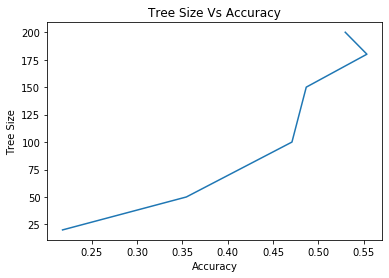

In [41]:
plt.plot(loop_acc,sizes)
plt.title("Tree Size Vs Accuracy")
plt.ylabel("Tree Size")
plt.xlabel("Accuracy")
plt.show()

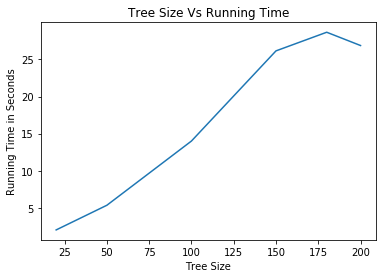

In [42]:
plt.plot(sizes, rt)
plt.title("Tree Size Vs Running Time")
plt.xlabel("Tree Size")
plt.ylabel("Running Time in Seconds")
plt.show()

In [43]:
n_t = [1, 5, 10, 15, 20]

loop_acc_nt = []
rt_nt = []

for i in n_t:
    rf = RandomForest()
    import time
    start = time.time()
    model = rf.fit(data_train, label_train, size = 200, n_trees = i, depth=8)
    pred = rf.predict(x = data_validation)
    pred = pred[0].astype(int)
    pred = pd.DataFrame(pred[0])[0]
    acc = calculate_accuracy(label_validation, pred.values)
    t = time.time() - start
    rt_nt.append(t)
    
    print(acc)
    
    loop_acc_nt.append(acc)


List of selected sample used in our tree: [ 1683  9142  8327 12996  6295 13771  4425 18860 16073  8291 15701  9546
  2483  6310 11703 15605 16193  1284 14671  3152  3059  6924  8727 11600
 14791  5067  3817  8702 14318 16536  6798  7318  6699 20255  2311 11608
 14523 19071 20512  4116 15534    53  2230 19002  1428  7010 18701 20667
 19598  2369 16049 20200  9315  2683 17898 10355  9754 11133  9478 11378
 12774  6658  3825 19556  9060 13610 14199 14795  2487  4753  9630  5288
  2437 14986 15555  9772 10998  2627 10138 13417 19412 18351 12946 14907
 19022 11243  4487   551  1951  1715 15724  2434    38 20611  8313 17988
 15502  6731 15133 10202 15732  3405 12137  4783 13133 19771 13469  1420
 20508  1799 10093  2287 14216  5343 12122 20503  1364  7085  2268  9457
  5996 19933  7842  9498 16415 16881  8018  6921  6786 17997   951 17745
  9053  3550  5293  5607  3455  8547  1233  9286 18671 17181 10656   836
  1235 16254  5565 15754  6909 10192  4849  6128  8118 15216 11985 16790
 15486  8

List of selected sample used in our tree: [ 3958  2812 12177 19199 15971 19745 12929 19896 11757 20640  8264 13588
 14852  6768 10283 20069 20152   388 19841 11257 13553 15838  9832  7074
 16436 20137 11926 13745 14339  9083 13688 19146 10238  3791  9536 10850
 10972  6481  3922 19307  8359  4921 15744 20513  5784 18160 16974 18356
 20057 17553 19227 20909 10199 15409  3143 13714 16569 13508  6558 12214
 18087  1430 17868  2209 20903 12807 12708 15261  7543  7665 19298  3748
 18593  2888 16079  5121  9790 18693  4195 17575   115  4754 16442 12163
 11919 18729  5316 13276 18922 10077 15060 18094 14679 19797 12164  3751
    25 11524  2745 18247  4728 18027  9166 10688 18615  3094  7769  6015
  7880 15560   216 15422  4792  3798 11525  4536 12074  5226  3817 10421
  8765 19922 15935 19996 13662 16851 19644  9448 19426 17618 17733 14368
  2178  2495   535  5414   943 16816 17223  1870 16368 20902 15544 17955
 15759 20892 15193   435  2371  6396 13660  7749 18929 18496  2878 14689
 13250 10

List of selected sample used in our tree: [10923  4971  8315  8011  6894 17386 18483  4651 14415  7867 15461 13548
  7420 14101  4249 16598  6472 12591  3389  1885  9497  9458 12471 14896
 15237 12391 15818 17009  5750 20677 19262 18383 15059  9444  1797   227
  6170  4850  5721  1186 12804 16989  3683 13073  9988   960 20264 12031
 14878 16861  9706  3259 10653  1492 11650  1138  8191   276 20082  1727
  2655 19171 19182  2672  4892  8009 14800 20878 12834 15474 10517  9586
  2805 18064 15525  2460 20983  1627 11552  7395 20650 19311 19668 20415
 10642 10204 16337  4785  5725  7531 20612 18776 13369  9878 10682  8056
  7369  3317 12932 19474  6436 14582 10199 11838  4878 12626  4284   459
 19516  1312 19660   858 12844 20728  5845   241  8389 16407  1706 13270
 12859  6396 17861  4500  5680 14618  8038 10825  4714 14719   994 16759
 15405  5910 20692  5342  2582  5512  7411  6643  7383  4574  9002 20866
  6442  5408  8343  3034  7639 14200  3764  2984  8476  2866  2493   394
 13269 18

List of selected sample used in our tree: [ 1053  4080 10299  3786  3194   391  2275  7637  6025  1440    54  5234
 10531  1861 19673 18438  8647 15115 11338  9985 16567   934  3576   432
 18298 11587  7058   147  3048 14191  9182 18846 17262 20899 17237 20652
  1915 20129 18027  7382  6725 16001  1865  6770  9807 12685  5951 16472
  8879 17719  5535  8641   353  3899 18161 11951 19374 19914  7265 18243
 18860 11385  4975   224  6937  9323 16647 11607  7085 16535  3198  3580
 14449 10765 15835 11595 14394 12040 16266 20068  8650 18712 15412 14090
 19482   750 13316  4020 10574 18484 19901 19811 10101 10566  5367 13910
  7414  6487  8842 14267 17241 12664  9898   805  4372 10327 20379 11834
 12544 15464 10594 14599  2784 15832    48  1368  3103 16651  5723 17383
  2132 13179  7975  2478 20624 20382 13730 20813  8944  9307  5010 17131
 20204 15752 15791 16520   866 17022 12976  5147 14255  1280  1351  4710
 13866   221 10750  7134 13641 14681 19759  7055  4643  4389 20299  7362
 10817 13

List of selected sample used in our tree: [11034  6018 10941 18183 18726 13380   569 17150 15538 10697 19758 16223
  4508  8759  1860  8138  1417 16408 15487 19649  3409   851 18419  4803
  2640  9638 16192 16721 16384 19054 16145  2153  1957   867 11001  2791
 20412  7838  5403  2373  9471 17489  4863 10166  1275  4087 20894  8388
  5141  3152 10902 18039  4893   190  3922  3075  4122 12087 16494  9264
 10336 14811  2052 11780  6726 11334 18365 18688 14388 16341  7061  1172
 10242 15329  8987 17538  1937  1524  6575 19170 18194 16900 15574 10108
   129  8372  1186 18877 20269   756   666 13067 11661 10495  4882 18271
   447  7801  4447 19109 14204   752 13196  8167 12057 19995  5401 16078
 17765  6731 19744  3707  8857  7735 18616 20117  2877 11779  1400 12044
  2729 11006 14089  2930  6201 20939 10089 10298  3390  7941 19926 12445
  8034  3894  6798  4810 17267  7254   167 12580 17067 15070  7060  3109
 16681 16316  3422  6715   850  2358  5360 19452 10432 14900 17819 19316
 15813  5

List of selected sample used in our tree: [12540 20208  6321 14465 20464 15563  8087 15041 15115 16412  5228  5581
   905   521 12210 11900 19188 16472 16289  8651   425  3339  6620  8559
  2986  1977  5578 20122 20886 11176   733 14083 10001  7361  3986 20432
  5315 11642   251   631 14584 13644  1887  8761  8849 16344 10395 11837
 13725 14879 14461 19441  5695  3754  6595  5417  1588 10647 10552  8809
 10621  9851  4995   862  2030 10909  1612   803 16276 16102  1583  1991
  1630  3459 15068 20200  6551  4247  4825 15777  5769 17974 19303 12910
  1804 14328  4462  3455  4110 11744  7105 18464 16698  6361  5737 11964
   829  8877 15013 17406 13373  1752  5313 13832  7476 20671  1461  9683
 14430  1325  6633 11361   384   644 10667  2111 19912 13805 14733 19872
  2186 15396  2981 12960 11701 18603 17322 14689  9970 10319 17486  5436
 15366 12854 20301 12803  8946 19502   815 14572 16699  2341 17773 17290
 11422 18529 10614 12046  8031 11131  7843  4425 15468  3465  3073 18853
 17376 14

List of selected sample used in our tree: [12424  8459   518  1420  5155  3676 12217 14713 12150  3330  3197 19501
  7446 17239  6936 11788 20245 16714   772  7424 14400  5693 15495 19386
  6987  6187 11061 12974  4958  9532 15670 14468  3960 16366 10705  8529
  3048  5439  7296  5218  8623  2750 10057   463  4566 17207  4705  7008
  2440  9934  5399  3762  8868  8281 14214 16874  4876 19518 10912  6495
 20735 15524 14078 12135  7839 19036 19107 10003  4842 14539 17314 11047
 13320  9530 13782 14450 19197 12770 14744  4905  7819  2776  1277  2801
  6567 17362 16664 14821 11581  5627 10908 20986  9009 13015 10090  2638
  6054 20581 15517  5948  7752 14272  7479 19213  3195  9110  2170  8966
 17260 19218 13723 19323  5016  6439  4534  1785  7242 11383  7995  5343
  6215 20300 12792 12576  3510   903   257 18359 12064  6279 13947 10499
 14011 16287 15668 12001  6039 10715 18609 14196 15645 15534   962   137
 11446 11570  6979  2976 14668 14595  7992  5588  2176  4140 19563  8789
  6139  5

List of selected sample used in our tree: [ 4696 18128   695 18095  6751 17295 11320 18371 12844 20955  3643  7080
   410  8990 16361 17205   748 17485 14716 18531  6059 15039 15042  6306
 16701  7261 10321  1938 15366  3344 12293  1872 15684  5935  5960 14288
  4883 13650 19859 10501 15687  4262 19254 18619 11524  7019 19836 20285
 17446 11448 20006  8825  6133  5526 10121  6389 19276  1974  8225  4916
 19978 10083  8821 15612  7732 10702 17435 15852 16010  9111  6441 12161
  8021  6399 10662  2366 11053 10714 18052  1340 13985  7210  2043  1640
 15273  3961  9460 12127  3744 11859  3525 17501 10955  7661  1147 16688
 11258  3048 20931  3411  5115 20815  5133 18078  1331  8499  5916  3832
   778 16014  8521   876  3949  7307 17229 10922 13735  8789 17844  9126
 19761  5315 12447  1520 18976 19563 16312 15516  7881 15368  3259   414
 19664  3290 14472  7143 11699 15077  6286 14561   956 15904  6507  9686
 19376 12650  9081 20288 10154  5498 16994  9283 13249 17328 16657 16683
  1041 19

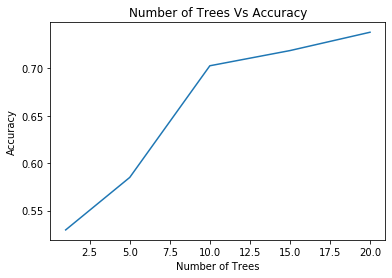

In [44]:
plt.plot(n_t,loop_acc_nt)
plt.title("Number of Trees Vs Accuracy")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.show()

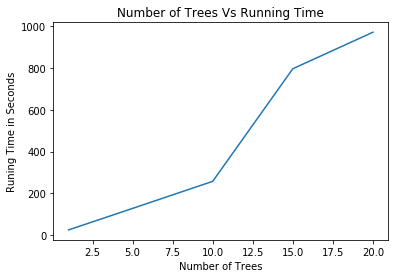

In [45]:
plt.plot(n_t, rt_nt)
plt.title("Number of Trees Vs Running Time")
plt.ylabel("Runing Time in Seconds")
plt.xlabel("Number of Trees")
plt.show()

### Random Forest Model Tuning

In [46]:
start_time = time.time()

rf = RandomForest()
model = rf.fit(data_train, label_train, size = 180, n_trees = 20, depth=8)

List of selected sample used in our tree: [ 1683  9142  8327 12996  6295 13771  4425 18860 16073  8291 15701  9546
  2483  6310 11703 15605 16193  1284 14671  3152  3059  6924  8727 11600
 14791  5067  3817  8702 14318 16536  6798  7318  6699 20255  2311 11608
 14523 19071 20512  4116 15534    53  2230 19002  1428  7010 18701 20667
 19598  2369 16049 20200  9315  2683 17898 10355  9754 11133  9478 11378
 12774  6658  3825 19556  9060 13610 14199 14795  2487  4753  9630  5288
  2437 14986 15555  9772 10998  2627 10138 13417 19412 18351 12946 14907
 19022 11243  4487   551  1951  1715 15724  2434    38 20611  8313 17988
 15502  6731 15133 10202 15732  3405 12137  4783 13133 19771 13469  1420
 20508  1799 10093  2287 14216  5343 12122 20503  1364  7085  2268  9457
  5996 19933  7842  9498 16415 16881  8018  6921  6786 17997   951 17745
  9053  3550  5293  5607  3455  8547  1233  9286 18671 17181 10656   836
  1235 16254  5565 15754  6909 10192  4849  6128  8118 15216 11985 16790
 15486  8

List of selected sample used in our tree: [10923  4971  8315  8011  6894 17386 18483  4651 14415  7867 15461 13548
  7420 14101  4249 16598  6472 12591  3389  1885  9497  9458 12471 14896
 15237 12391 15818 17009  5750 20677 19262 18383 15059  9444  1797   227
  6170  4850  5721  1186 12804 16989  3683 13073  9988   960 20264 12031
 14878 16861  9706  3259 10653  1492 11650  1138  8191   276 20082  1727
  2655 19171 19182  2672  4892  8009 14800 20878 12834 15474 10517  9586
  2805 18064 15525  2460 20983  1627 11552  7395 20650 19311 19668 20415
 10642 10204 16337  4785  5725  7531 20612 18776 13369  9878 10682  8056
  7369  3317 12932 19474  6436 14582 10199 11838  4878 12626  4284   459
 19516  1312 19660   858 12844 20728  5845   241  8389 16407  1706 13270
 12859  6396 17861  4500  5680 14618  8038 10825  4714 14719   994 16759
 15405  5910 20692  5342  2582  5512  7411  6643  7383  4574  9002 20866
  6442  5408  8343  3034  7639 14200  3764  2984  8476  2866  2493   394
 13269 18

List of selected sample used in our tree: [10816  8098 10101 10736  4751  4119 14202 14418 14181  6564 10974 13472
 15217 19393  8205  9446 15158 11901  5157 13264  3366  6680 18458  1309
 20106  1458 19168  3261 12915  2042 19388 10893 10547 10505  3429 17385
  9464 13084 10230 15812 14428 16841  4829  2611 15151 14836 19808  5387
  2037 10223  8050 20854   199  4819  2666 13001 15551  5171 17184 16260
 14020  4106 20622 13619  2695  6267 14299  7920  4313 11539 16390 12273
   959  9102   149  2786  3100   499  2062  3552  2183  5594  4255  2307
 19971 11650 16737 20044 12626  8905 10801 15036 20294 10246  7927  5694
  7580 11259 19727  5601  3414  6948  2605  8806  8866 15762  2026  8009
  7556   872 18143  2635 12221  7124  7565 13951 15707   241  7581 19177
  6195  7035  1903  6936 19812 19201 16066 17374 17406 11477 16149  3165
 13732  7327 16529  2622 12081 14579  9403  2014  3282 15371 20431  8755
  8074  9978 17249  2727  2190  6634  3274 11204  7378 20345 15226 19832
  5122 18

### Validate Model

In [47]:
label_validation_pred = rf.predict(x = data_validation)
label_validation_pred = label_validation_pred[0].astype(int)
label_validation_pred = pd.DataFrame(label_validation_pred[0])[0]
acc = calculate_accuracy(label_validation, label_validation_pred.values)

print(acc)
print("%s seconds" % (time.time() - start_time))

0.7448888888888889
449.58245301246643 seconds


### Measure Test Accuracy

In [48]:
data_path = input_dir+"/"+"images_testing.h5"
label_path = input_dir+"/"+"labels_testing_2000.h5"
data_test  = loading_data_label(data_path)
label_test = loading_data_label(label_path)

# Taking first 2000 examples from the given dataset
data_test = data_test[0:2000, :]
label_test_pred = rf.predict(x = data_test)
label_test_pred = label_test_pred[0].astype(int)
label_test_pred = pd.DataFrame(label_test_pred[0])[0]

print(data_test.shape, label_test.shape)
accuracy = calculate_accuracy(label_test, label_test_pred)
print("The accuracy of the given model on the test set is:", accuracy)

(2000, 784) (2000,)
The accuracy of the given model on the test set is: 0.7385


### Random Forest - Evaluation

In [49]:
y_act = pd.Series(label_validation[:], name = "Actual")
y_pred = pd.Series(label_validation_pred, name = "Predicted")
confusion = pd.crosstab(y_act, y_pred)

#check the confusion matrix
confusion

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,659,6,25,60,18,3,82,9,21,0
1,1,813,16,60,3,1,13,0,0,0
2,39,5,628,8,148,2,85,2,10,0
3,57,27,44,702,55,0,27,1,4,0
4,1,4,149,35,567,2,99,0,5,0
5,0,2,0,1,1,689,1,142,9,45
6,135,9,152,42,142,9,375,3,37,0
7,0,0,0,0,0,30,0,800,3,76
8,3,0,22,14,10,72,33,75,685,1


In [50]:
#check the normalised confusion matrix
confusion_acc = confusion / confusion.sum(axis = 1)
confusion_acc

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,0.746319,0.006615,0.026969,0.065431,0.020882,0.003371,0.090708,0.009901,0.022951,0.000000
1,0.001133,0.896362,0.017260,0.065431,0.003480,0.001124,0.014381,0.000000,0.000000,0.000000
2,0.044168,0.005513,0.677454,0.008724,0.171694,0.002247,0.094027,0.002200,0.010929,0.000000
3,0.064553,0.029768,0.047465,0.765540,0.063805,0.000000,0.029867,0.001100,0.004372,0.000000
4,0.001133,0.004410,0.160734,0.038168,0.657773,0.002247,0.109513,0.000000,0.005464,0.000000
5,0.000000,0.002205,0.000000,0.001091,0.001160,0.774157,0.001106,0.156216,0.009836,0.050790
6,0.152888,0.009923,0.163970,0.045802,0.164733,0.010112,0.414823,0.003300,0.040437,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.033708,0.000000,0.880088,0.003279,0.085779
8,0.003398,0.000000,0.023732,0.015267,0.011601,0.080899,0.036504,0.082508,0.748634,0.001129


In [51]:
confussion = confusion.values
confusion_acc = confusion_acc.values

In [52]:
#get accuracy for each labels
labels_acc = np.diag(confusion_acc)
labels_acc

array([0.74631937, 0.89636163, 0.67745415, 0.7655398 , 0.65777262,
       0.7741573 , 0.41482301, 0.88008801, 0.74863388, 0.88713318])

# Neural Network

### Creating the neural network and defining functions

In [75]:
# Initialization of the weight matrices and bias vectors

def param_initialization(n_x, n_y, n_h1, n_h2):
    p = {}
    np.random.seed(42)
    p['W1'] = np.random.randn(n_h1,n_x) * 0.01
    p['b1'] = np.zeros(shape=(n_h1,1)) 
    p['W2'] = np.random.randn(n_h2,n_h1) * 0.01
    p['b2'] = np.zeros(shape=(n_h2,1)) 
    p['W3'] = np.random.randn(n_y,n_h2) * 0.01
    p['b3'] = np.zeros(shape=(n_y,1))
    
    return p

In [76]:
# Activation function at the output layer
# Activation function used in the hidden layers is tanh function already defined in the numpy library

def softmax(x):
    return np.exp(x) / sum (np.exp(x))

In [77]:
# Feed- forwarding the data to the neural network. This is the first step in the training the neural network

def feed_forward_propagation(X, p):
    Zvals = {}
    Avals = {}
    Zvals['Z1'] = np.dot(p['W1'], X) + p['b1']
    Avals['A1'] = np.tanh(Zvals['Z1'])
    Zvals['Z2'] = np.dot(p['W2'], Avals['A1']) + p['b2']
    Avals['A2'] = np.tanh(Zvals['Z2'])
    Zvals['Z3'] = np.dot(p['W3'], Avals['A2']) + p['b3']
    Avals['A3'] = softmax(Zvals['Z3']) # Final output prediction
    
    return Zvals,Avals

In [78]:
# Computation of cost using the cost entropy function

def cost_computation_fn(A3, Y, batch_size):
    logprobs = np.multiply(np.log(A3), Y) + np.multiply((1 - Y), np.log(1 - A3))
    cost = - np.sum(logprobs) / batch_size
    return cost

In [79]:
# Back propagation of the error calculated using the gradient descent

def back_propagation(X, Y, Avals, p, batch_size):
    e ={}
    
    e['dZ3'] = Avals['A3'] - Y
    e['dW3'] = (1 / batch_size) * np.dot(e['dZ3'], Avals['A2'].T)
    e['db3'] = (1 / batch_size) * np.sum(e['dZ3'], axis=1, keepdims=True )
    
    e['dZ2'] = np.multiply(np.dot(p['W3'].T, e['dZ3']), 1 - np.power(Avals['A2'],2))
    e['dW2'] = (1 / batch_size) * np.dot(e['dZ2'], Avals['A1'].T)
    e['db2'] = (1 / batch_size) * np.sum(e['dZ2'], axis=1, keepdims=True)
    
    e['dZ1'] = np.multiply(np.dot(p['W2'].T, e['dZ2']),(1 - np.power(Avals['A1'],2)))
    e['dW1'] = (1 / batch_size) * np.dot(e['dZ1'], X.T)
    e['db1'] = (1 / batch_size) * np.sum(e['dZ1'], axis=1, keepdims=True)
    
    return  e

In [80]:
# Updating the parameters after every iteration to obtain the corrected weights and bias vectors

def params_update(p,e,l):
    p['W1'] = p['W1'] - l * e['dW1']
    p['W2'] = p['W2'] - l * e['dW2']
    p['W3'] = p['W3'] - l * e['dW3']
    p['b1'] = p['b1'] - l * e['db1']
    p['b2'] = p['b2'] - l * e['db2']
    p['b3'] = p['b3'] - l * e['db3']
    return p

In [81]:
# Creating the neural netowrk model which returns the corrected weights and bias to be used for prediction

def NN_model_training(iteration, batch_size, learning_rate, data_train, label_train):
    
    # Defining network parameters

    n_x = data_train.shape[0]
    n_h1 = n_x
    n_h2 = 400
    n_y = label_train.shape[0]
    
    # Random Initialization of Weights and Bias Vectors
    params = param_initialization(n_x,n_y,n_h1,n_h2)

    for j in range(iteration):
        print("Going through epoch : {}".format(j))
        for i in range(0, data_train.shape[1], batch_size):
                
            # Forward Propagation
            adj_weights , layer_val = feed_forward_propagation(data_train[:, i:i+batch_size], params)
     
            # Computation of Cost By Cost Entropy
            cost = cost_computation_fn(layer_val['A3'], label_train[:,i:i+batch_size] , batch_size)

            # Back Propagation
            errors_bp = back_propagation(data_train[:, i:i+batch_size], label_train[:,i:i+batch_size] ,layer_val, params, batch_size)

            # Updating Parameters
            params = params_update(params,errors_bp,learning_rate)
    
    return params

In [82]:
# Prediction Function used to predict the output for the validation/test dataset

def prediction_fn(data, model):
    
    data = data_preprocessing_for_NN(data)
    adj_weights_pred , layer_val = feed_forward_propagation(data, model)
    layer_val_pred = np.argmax(layer_val['A3'], axis = 0)
    return layer_val_pred


In [83]:
def calculate_accuracy(label, label_predicted):
    acc = np.sum(label_predicted == label)/ label_predicted.shape[0]
    return acc*100

### Running the algorithm

In [84]:
# The path of the directory containing the training data is passed here
input_dir = "./Input"
data_path = input_dir+"/"+"images_training.h5"
label_path = input_dir+"/"+"labels_training.h5"

data  = loading_data_label(data_path)
label = loading_data_label(label_path)
print(label.shape, data.shape)

(30000,) (30000, 784)


### One-hot encoding of the label train

In [85]:
# Performing one-hot encoding of the label train set to be used while network training
levels = np.unique(label).shape[0]
label_interim = np.zeros(shape=(levels,label.shape[0]))
for i in range(label.shape[0]):
    pos = label[i]
    label_interim[pos][i] = 1
print(label_interim.shape)

(10, 30000)


### Train and Validation split

In [86]:
# Splitting the dataset in training and validation sets 
split = int( 0.7 * data.shape[0] )

# Training Set
data_train = data[0:split,:]
label_train = label_interim[:,0:split]

# Validation Set
data_validation  = data[split:data.shape[0],:]
label_validation = label[split:data.shape[0]]



### Train the Neural Nets and Accuracy on Validation Set

In [87]:
start_time = time.time()

In [88]:
# Pre-processing the training data

data_train = data_preprocessing_for_NN(data_train)

In [89]:
iteration = 180
batch_size = 500
learning_rate = 0.01

# Training the model
model = NN_model_training(iteration, batch_size, learning_rate, data_train, label_train)

label_validation_pred = prediction_fn(data_validation, model)

accuracy = calculate_accuracy(label_validation, label_validation_pred)

print("The accuracy of the given model on the validation set is:"+ str(accuracy)+"%")


Going through epoch : 0
Going through epoch : 1
Going through epoch : 2
Going through epoch : 3
Going through epoch : 4
Going through epoch : 5
Going through epoch : 6
Going through epoch : 7
Going through epoch : 8
Going through epoch : 9
Going through epoch : 10
Going through epoch : 11
Going through epoch : 12
Going through epoch : 13
Going through epoch : 14
Going through epoch : 15
Going through epoch : 16
Going through epoch : 17
Going through epoch : 18
Going through epoch : 19
Going through epoch : 20
Going through epoch : 21
Going through epoch : 22
Going through epoch : 23
Going through epoch : 24
Going through epoch : 25
Going through epoch : 26
Going through epoch : 27
Going through epoch : 28
Going through epoch : 29
Going through epoch : 30
Going through epoch : 31
Going through epoch : 32
Going through epoch : 33
Going through epoch : 34
Going through epoch : 35
Going through epoch : 36
Going through epoch : 37
Going through epoch : 38
Going through epoch : 39
Going thro

### Accuracy on Test Set

In [90]:
# Prediction on the given test set

# The path of the directory containing the training data is passed here
input_dir = "./Input"


data_path = input_dir+"/"+"images_testing.h5"
label_path = input_dir+"/"+"labels_testing_2000.h5"
data_test  = loading_data_label(data_path)
label_test = loading_data_label(label_path)

# Taking first 2000 examples from the given dataset
data_test = data_test[0:2000, :]
label_test_pred = prediction_fn(data_test, model)

print(data_test.shape, label_test.shape)
accuracy = calculate_accuracy(label_test, label_test_pred)
print("The accuracy of the given model on the test set is:", accuracy)

print("%s seconds" % (time.time() - start_time))


(2000, 784) (2000,)
The accuracy of the given model on the test set is: 85.15
551.7004680633545 seconds


### Predicting the labels for 5000 examples from Test set - Final Output

In [91]:
input_dir = "./Input"
data_path = input_dir+"/"+"images_testing.h5"
data_pred  = loading_data_label(data_path)

# Taking first 5000 examples from the given dataset
data_pred = data_pred[0:5000, :]
label_pred = prediction_fn(data_pred, model)

# Saving the output file
output_dir = "./Output"
output_predicted_file(output_dir, label_pred)

### Neural Network - Evaluation

In [92]:
import pandas as pd

y_act = pd.Series(label_validation[:], name = "Actual")
y_pred = pd.Series(label_validation_pred, name = "Predicted")
confusion = pd.crosstab(y_act, y_pred)

#check the confusion matrix
print(confusion)

Predicted    0    1    2    3    4    5    6    7    8    9
Actual                                                     
0          736    4   15   36    9    1   71    0   11    0
1            2  873    5   22    1    1    3    0    0    0
2            8    4  701    8  131    0   68    0    7    0
3           33   12    5  810   35    0   19    0    3    0
4            1    0   73   21  714    0   52    0    1    0
5            0    0    0    0    0  816    0   40    5   29
6          128    1   91   30  102    0  533    0   19    0
7            0    0    0    0    0   23    0  842    1   43
8            2    0    5    6    9    3   12    5  873    0
9            0    0    0    0    0    6    0   49    1  830


In [93]:
#check the accuracy confusion matrix
confusion_acc = confusion / confusion.sum(axis = 1)
print(confusion_acc)

Predicted         0         1         2         3         4         5  \
Actual                                                                  
0          0.833522  0.004410  0.016181  0.039258  0.010441  0.001124   
1          0.002265  0.962514  0.005394  0.023991  0.001160  0.001124   
2          0.009060  0.004410  0.756203  0.008724  0.151972  0.000000   
3          0.037373  0.013230  0.005394  0.883315  0.040603  0.000000   
4          0.001133  0.000000  0.078749  0.022901  0.828306  0.000000   
5          0.000000  0.000000  0.000000  0.000000  0.000000  0.916854   
6          0.144960  0.001103  0.098166  0.032715  0.118329  0.000000   
7          0.000000  0.000000  0.000000  0.000000  0.000000  0.025843   
8          0.002265  0.000000  0.005394  0.006543  0.010441  0.003371   
9          0.000000  0.000000  0.000000  0.000000  0.000000  0.006742   

Predicted         6         7         8         9  
Actual                                             
0          0.078540

In [94]:
confussion = confusion.values
confusion_acc = confusion_acc.values

In [95]:
#get accuracy for each labels
labels_acc = np.diag(confusion_acc)
labels_acc

array([0.83352208, 0.96251378, 0.7562028 , 0.88331516, 0.82830626,
       0.91685393, 0.58960177, 0.92629263, 0.95409836, 0.93679458])